<a href="https://colab.research.google.com/github/ShowkatImam/try/blob/main/suicidal_ideation_IF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import string
import re
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import KFold
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from tabulate import tabulate
import itertools

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

*Upload*  data set CSV File

In [2]:
from google.colab import drive
drive.mount('/content/drive1')

Mounted at /content/drive1


In [3]:
df2 = pd.read_csv('/content/drive1/MyDrive/suicide_watch_try12.csv',encoding= 'unicode_escape')

In [4]:
df2.head(100)

,Post,Ideation
0,might fuck around and kill myself,1
1,Life is the procrastination of death and I am ...,1
2,Every night I contemplate suicide and every ti...,1
3,I hate that Im living for other people,1
4,I hate my circumstances. I really don't see ho...,1
...,...,...
95,Suicide is a permanent solution to a permanent...,1
96,I havent wanted to kill myself in a week!,1
97,I might go jump off a bridge soon,1
98,"I was sexually assaulted, assaulted someone an...",1


Clanning

In [5]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r' ', text)
    text = text.lower()
    return text

In [6]:
df2['Post']=df2['Post'].apply(str)



remove punctuation mark

In [7]:
import string
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s


In [8]:
df2['Post'] = df2['Post'].apply(remove_punctuation)
df2.head(10)

,Post,Ideation
0,might fuck around and kill myself,1
1,Life is the procrastination of death and I am ...,1
2,Every night I contemplate suicide and every ti...,1
3,I hate that Im living for other people,1
4,I hate my circumstances I really dont see how ...,1
5,yesterday i tried to kill myself with a knife ...,1
6,I need to kill myself This summer June 29 I ha...,1
7,Im a junkie who watched the love of my life co...,1
8,never failed harder in school than this year p...,1
9,I will die alone Hurt this I dont really care ...,1


In [9]:
df2['Ideation'].value_counts()

1    1538
0    1166
Name: Ideation, dtype: int64

In [10]:
df2['Post']=df2['Post'].apply(str)

In [11]:
messages=df2.copy()
messages.head(20)

,Post,Ideation
0,might fuck around and kill myself,1
1,Life is the procrastination of death and I am ...,1
2,Every night I contemplate suicide and every ti...,1
3,I hate that Im living for other people,1
4,I hate my circumstances I really dont see how ...,1
5,yesterday i tried to kill myself with a knife ...,1
6,I need to kill myself This summer June 29 I ha...,1
7,Im a junkie who watched the love of my life co...,1
8,never failed harder in school than this year p...,1
9,I will die alone Hurt this I dont really care ...,1


In [12]:
messages['Post']

0                       might fuck around and kill myself
1       Life is the procrastination of death and I am ...
2       Every night I contemplate suicide and every ti...
3                 I hate that Im living for other people
4       I hate my circumstances I really dont see how ...
                              ...                        
2699    The only way thermodynamics are funny A thermo...
2700    A thief broke into my house last night He was ...
2701    Why do they allow people in wheelchairs to bri...
2702    Depression I was so depressed last night think...
2703    What do you call a cow thats had an abortion D...
Name: Post, Length: 2704, dtype: object

Stop Word removing And Stemming

In [13]:
import string 
import nltk 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Post'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(wordss) for wordss in review if not wordss in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
  corpus

['might fuck around kill',
 'life procrastin death plan take action',
 'everi night contempl suicid everi time think parent would feel want sad guilti way kill without happen recent slowli care less would feel idk feel like live timer close end soon know',
 'hate live peopl',
 'hate circumst realli dont see im continu havent caught break decad one tragedi next world unbeliev harsh feel crazi like im live age dinosaur tri get eaten',
 'yesterday tri kill knife save im mental hospit mom hate girlfriend go leav think dont know im go suffoc',
 'need kill summer june method plan write note think realli kill die point inevit certain say die natur know mean would actual speed process happen either way get death alway finish line die matter die coupl year earlier plan death death matter happen suicid natur death liter thing execut differ way',
 'im junki watch love life commit suicid',
 'never fail harder school year probabl go summer school make want mf kill jesu christ dumb',
 'die alon hurt

TF_IDF Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()



train test spliting

In [17]:
y=messages['Ideation']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [18]:
tfidf_v.get_feature_names()
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(100)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abil,abl,abl get,abl help,abort,absent,absent parent,absent parent love,absolut,absolut noth,abus,abus child,abus parent,abus trauma,academ,accept,accept fact,access,accid,accident,accomplish,account,ach,achiev,achiev anyth,across,act,act like,action,activ,actual,actual care,actual kill,ad,add,addict,address,adhd,admit,...,year get,year get help,year go,year half,year hell,year ill,year im,year ive,year later,year life,year old,year want,yell,yesterday,yet,yet know,yet still,yo,youll,young,young age,young man,younger,younger brother,your,your charg,your help,your help pleas,your parti,youth,youtub,youv,youv demonstr,youv demonstr understand,zero,zipper,zoloft,zombi,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Confusion matrix Pyload

In [19]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Machine Learnig classification Algo 

In [20]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()




accuracy:   0.93227
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       346
           1       0.95      0.94      0.94       466

    accuracy                           0.93       812
   macro avg       0.93      0.93      0.93       812
weighted avg       0.93      0.93      0.93       812



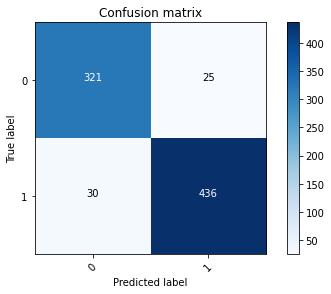

In [21]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.5f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1'])
print(classification_report(y_test,pred))

In [22]:
#svm = SVC(kernel='linear', C=1E10)
#svm.fit(train_vectors_dbow, y_train)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))
clf.fit(X_train, y_train)



OneVsRestClassifier(estimator=SVC(class_weight='balanced', kernel='linear',
                                  probability=True))

accuracy:   0.930
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       346
           1       0.96      0.92      0.94       466

    accuracy                           0.93       812
   macro avg       0.93      0.93      0.93       812
weighted avg       0.93      0.93      0.93       812



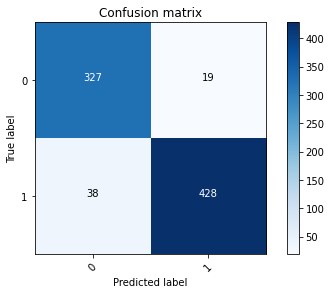

In [23]:
pred4 =clf.predict(X_test)
score4 = metrics.accuracy_score(y_test, pred4)
print("accuracy:   %0.3f" % score4)
cm4 = metrics.confusion_matrix(y_test, pred4)
plot_confusion_matrix(cm4, classes=['0', '1'])
print(classification_report(y_test,pred4))

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.922
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       346
           1       0.94      0.93      0.93       466

    accuracy                           0.92       812
   macro avg       0.92      0.92      0.92       812
weighted avg       0.92      0.92      0.92       812



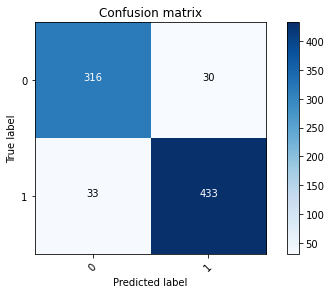

In [25]:
linear_clf.fit(X_train, y_train)
pred5 =linear_clf.predict(X_test)
score5 = metrics.accuracy_score(y_test, pred5)
print("accuracy:   %0.3f" % score5)
cm5 = metrics.confusion_matrix(y_test, pred5)
plot_confusion_matrix(cm5, classes=['0', '1'])
print(classification_report(y_test,pred5))

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

accuracy:   0.860
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       346
           1       0.91      0.84      0.87       466

    accuracy                           0.86       812
   macro avg       0.86      0.86      0.86       812
weighted avg       0.86      0.86      0.86       812



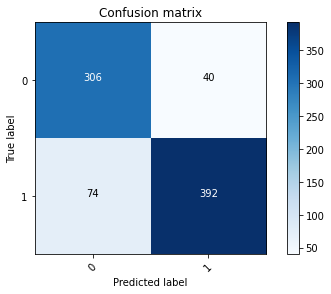

In [27]:
dt.fit(X_train, y_train)
pred6 =dt.predict(X_test)
score6 = metrics.accuracy_score(y_test, pred6)
print("accuracy:   %0.3f" % score6)
cm6 = metrics.confusion_matrix(y_test, pred6)
plot_confusion_matrix(cm6, classes=['0', '1'])
print(classification_report(y_test,pred6))

Ensemble Learning Classification Algorithams

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfcf=RandomForestClassifier()
rfcf.fit(X_train, y_train)

RandomForestClassifier()

accuracy:   0.93103
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       346
           1       0.95      0.93      0.94       466

    accuracy                           0.93       812
   macro avg       0.93      0.93      0.93       812
weighted avg       0.93      0.93      0.93       812



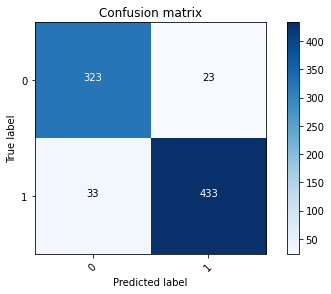

In [29]:
pred1 = rfcf.predict(X_test)
score1 = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.5f" % score1)
cm1 = metrics.confusion_matrix(y_test, pred1)
plot_confusion_matrix(cm1, classes=['0', '1'])
print(classification_report(y_test,pred1))

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

accuracy:   0.895
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       346
           1       0.89      0.93      0.91       466

    accuracy                           0.90       812
   macro avg       0.90      0.89      0.89       812
weighted avg       0.90      0.90      0.89       812



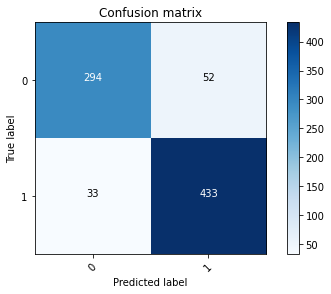

In [32]:
ada.fit(X_train, y_train)
pred7 =ada.predict(X_test)
score7 = metrics.accuracy_score(y_test, pred7)
print("accuracy:   %0.3f" % score7)
cm7 = metrics.confusion_matrix(y_test, pred7)
plot_confusion_matrix(cm7, classes=['0', '1'])
print(classification_report(y_test,pred7))

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt =GradientBoostingClassifier(random_state=1, subsample=0.7)

accuracy:   0.909
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       346
           1       0.94      0.90      0.92       466

    accuracy                           0.91       812
   macro avg       0.91      0.91      0.91       812
weighted avg       0.91      0.91      0.91       812



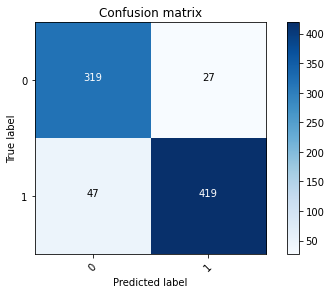

In [34]:
gbrt.fit(X_train, y_train)
pred8 =gbrt.predict(X_test)
score8 = metrics.accuracy_score(y_test, pred8)
print("accuracy:   %0.3f" % score8)
cm8 = metrics.confusion_matrix(y_test, pred8)
plot_confusion_matrix(cm8, classes=['0', '1'])
print(classification_report(y_test,pred8))

Voting Ensemble Methods

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
models = [('lr',LogisticRegression()),('svm', OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))),('rfc',RandomForestClassifier())]

In [37]:
voting_clas_hard = VotingClassifier(voting='soft', estimators=models )
voting_clas_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm',
                              OneVsRestClassifier(estimator=SVC(class_weight='balanced',
                                                                kernel='linear',
                                                                probability=True))),
                             ('rfc', RandomForestClassifier())],
                 voting='soft')

accuracy:   0.942
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       346
           1       0.96      0.94      0.95       466

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



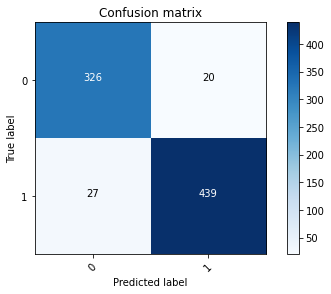

In [38]:
pred9 =voting_clas_hard.predict(X_test)
score9 = metrics.accuracy_score(y_test, pred9)
print("accuracy:   %0.3f" % score9)
cm9 = metrics.confusion_matrix(y_test, pred9)
plot_confusion_matrix(cm9, classes=['0', '1'])
print(classification_report(y_test,pred9))

Cross-Valodation 

In [ ]:
from sklearn.model_selection import KFold
kfold_validation1=KFold(10)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold_validation=StratifiedKFold(n_splits=10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score


In [ ]:
results_LR=cross_val_score(classifier,X,y,cv=kfold_validation)
print(results_LR)
print(np.average(results_LR))

[0.83394834 0.95940959 0.94464945 0.97416974 0.95185185 0.94074074
 0.93703704 0.91111111 0.92962963 0.90740741]
0.9289954899548996


In [ ]:
results_RF=cross_val_score(rfcf,X,y,cv=kfold_validation)
print(results_RF)
print(np.average(results_RF))


[0.83763838 0.95571956 0.94095941 0.95940959 0.94814815 0.94814815
 0.94074074 0.8962963  0.91851852 0.89259259]
0.9238171381713818


In [ ]:
results_naive_gaussian=cross_val_score(naive_gaussian,X,y,cv=kfold_validation)
print(results_naive_gaussian)
print(np.average(results_naive_gaussian))

[0.75645756 0.78597786 0.85239852 0.87084871 0.81481481 0.81481481
 0.82592593 0.7962963  0.84814815 0.85555556]
0.8221238212382124


In [ ]:
results_svm=cross_val_score(clf,X,y,cv=kfold_validation)
print(results_svm)
print(np.average(results_svm))

[0.8597786  0.9704797  0.94833948 0.97416974 0.96666667 0.94814815
 0.92592593 0.91111111 0.91851852 0.8962963 ]
0.9319434194341942


In [ ]:
results_linear_clf=cross_val_score(linear_clf,X,y,cv=kfold_validation)
print(results_linear_clf)
print(np.average(results_linear_clf))

[0.80442804 0.91512915 0.94464945 0.9298893  0.95185185 0.94074074
 0.9037037  0.91851852 0.92222222 0.90740741]
0.9138540385403854


In [ ]:
results_linear_clf=cross_val_score(linear_clf,X,y,cv=kfold_validation)
print(results_linear_clf)
print(np.average(results_linear_clf))

[0.82656827 0.92250923 0.94464945 0.93726937 0.95925926 0.92592593
 0.90740741 0.91111111 0.92962963 0.9037037 ]
0.9168033347000135


In [ ]:
results_dt=cross_val_score(dt,X,y,cv=kfold_validation)
print(results_dt)
print(np.average(results_dt))

[0.80073801 0.86715867 0.87084871 0.88191882 0.90740741 0.86666667
 0.87407407 0.85185185 0.87407407 0.84444444]
0.8639182725160586


In [ ]:
results_ada=cross_val_score(ada,X,y,cv=kfold_validation)
print(results_ada)
print(np.average(results_ada))

[0.83394834 0.91512915 0.90774908 0.91512915 0.9037037  0.9037037
 0.8962963  0.88148148 0.86666667 0.84814815]
0.8871955719557196


In [ ]:
results_gbrt=cross_val_score(gbrt,X,y,cv=kfold_validation)
print(results_gbrt)
print(np.average(results_gbrt))

[0.82656827 0.94833948 0.91881919 0.94095941 0.95555556 0.92962963
 0.9037037  0.85185185 0.89259259 0.87407407]
0.9042093754270877


In [ ]:
scores=cross_val_score(voting_clas_hard,X,y,cv=kfold_validation)
print(np.mean(scores))

0.9404592045920459


word cloud

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
df2['Post'].isnull().sum()

0

In [ ]:
Suicaldal = df2[df2.Ideation == 1]
print(Suicaldal.shape)

(1538, 2)


In [ ]:
Suicaldal['Post']= Suicaldal['Post'].str.lower()
Suicaldal['Post'].head()

0                    might fuck around and kill myself
1    life is the procrastination of death and i am ...
2    every night i contemplate suicide and every ti...
3              i hate that im living for other people
4    i hate my circumstances. i really don't see ho...
Name: Post, dtype: object

In [ ]:
all_suicidal = Suicaldal['Post'].str.split(' ')
all_suicidal.head()

0             [might, fuck, around, and, kill, myself]
1    [life, is, the, procrastination, of, death, an...
2    [every, night, i, contemplate, suicide, and, e...
3     [i, hate, that, im, living, for, other, people]
4    [i, hate, my, circumstances., i, really, don't...
Name: Post, dtype: object

In [ ]:
all_spam_cleaned = []

for text in all_suicidal:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
#final_text_spam[:55]

'might fuck around and kill myself life is the procrasti'

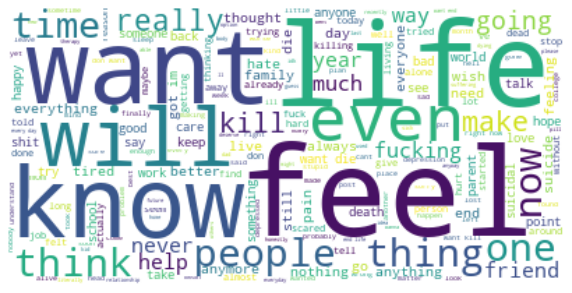

In [ ]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
Non_Suicaldal = df2[df2.Ideation == 0]
print(Non_Suicaldal.shape)

(1166, 2)


In [ ]:
Non_Suicaldal['Post']= Non_Suicaldal['Post'].str.lower()
Non_Suicaldal['Post'].head()

17     if i can get through this i will dedicate my l...
78                    my friend is suicidal, please help
91     i have a friend who is really suicidal. what s...
122                                 i don't want to die.
126    ever since my past suicide attempts, my mind h...
Name: Post, dtype: object

In [ ]:
all_non_suicidal1 = Non_Suicaldal['Post'].str.split(' ')
all_non_suicidal1.head()

17     [if, i, can, get, through, this, i, will, dedi...
78             [my, friend, is, suicidal,, please, help]
91     [i, have, a, friend, who, is, really, suicidal...
122                           [i, don't, want, to, die.]
126    [ever, since, my, past, suicide, attempts,, my...
Name: Post, dtype: object

In [ ]:
all_spam_cleaned_1 = []

for text in all_non_suicidal1:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned_1.append(text)

all_spam_cleaned_1[0]

text_spam_1 = [" ".join(text) for text in all_spam_cleaned_1]
final_text_spam_1 = " ".join(text_spam)
final_text_spam_1[:55]

'might fuck around and kill myself life is the procrasti'

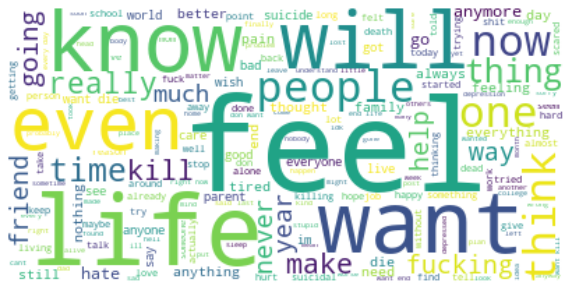

In [ ]:
wordcloud_spam_1 = WordCloud(background_color="white").generate(final_text_spam_1)

# Lines 2 - 5
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam_1, interpolation='bilinear')
plt.axis("off")
plt.show()

Prediction for real data

In [141]:
post= ["I just tried to kill myself now what. I was in the bathroom trying to slice my neck open. Shit ass knife now i got cuts on my neck n shit. Ahhhh. My dad is downstairs watching breaking bad, my mom is at a meeting, and my siblings are at school. Should I talk to someone. I’m really nervous I don’t wanna be a burden, but I think this is kind of a big deal.",
       "I wanna kill myself - I hate this face and mind. I hate my face so fucking much. I had to go somewhere and had to take a pic of myself and it's horrible seeing my face. Asymmetrical, it looks downright disfigured. I have one of those creepy pedo uncle faces. I have a pedo stache too and shaving it is just as worse because I have a bunch of fucking moles between my lips and nose and I use my mustache to hide that. No haircut or anything will fix it. My skull structure is just like that. I was born with this face. I'm sure people look at me and automatically think He's probably a creepy guy who watches mlp all day and diddles kids . I just have that kind of face and there s nothing I can do to fix that. I don not look like a creepy pedo uncle yet since I'm still 25 but I know that I will look like one. But if you take one of those creepy faces and put a younger filter then I ll probably appear."
]

In [142]:
post = [item.replace("'", "") for item in post]
post

['I just tried to kill myself now what. I was in the bathroom trying to slice my neck open. Shit ass knife now i got cuts on my neck n shit. Ahhhh. My dad is downstairs watching breaking bad, my mom is at a meeting, and my siblings are at school. Should I talk to someone. I’m really nervous I don’t wanna be a burden, but I think this is kind of a big deal.',
 'I wanna kill myself - I hate this face and mind. I hate my face so fucking much. I had to go somewhere and had to take a pic of myself and its horrible seeing my face. Asymmetrical, it looks downright disfigured. I have one of those creepy pedo uncle faces. I have a pedo stache too and shaving it is just as worse because I have a bunch of fucking moles between my lips and nose and I use my mustache to hide that. No haircut or anything will fix it. My skull structure is just like that. I was born with this face. Im sure people look at me and automatically think Hes probably a creepy guy who watches mlp all day and diddles kids . I

In [143]:
df = pd.read_csv('/content/drive1/MyDrive/New_text.csv',encoding= 'unicode_escape')
df


,Post,link,Unnamed: 2
0,I just tried to kill myself now what. I was in...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
1,I wanna kill myself - I hate this face and min...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
2,losing hope again. just venting. I have bpd. t...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
3,I wanna die. I can't go on any longer due to t...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
4,After my bunny is gone I'll have nothing to li...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
5,I just want to fucking die. I can't afford the...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
6,I really want to die. I am so sick of my life...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
7,Tried to drown myself. I have need really str...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
8,Planning when I'm gonna kill myself I thought ...,https://www.reddit.com/r/SuicideWatch/comments...,NaN
9,I remember being 13. Constant morning wood. Fu...,NaN,NaN


In [144]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus1 = []
for i in range(0, len(post)):
    review = re.sub('[^a-zA-Z]', ' ',  str(post[i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(wordss) for wordss in review if not wordss in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [145]:
   corpus1

['tri kill bathroom tri slice neck open shit ass knife got cut neck n shit ahhhh dad downstair watch break bad mom meet sibl school talk someon realli nervou wanna burden think kind big deal',
 'wanna kill hate face mind hate face fuck much go somewher take pic horribl see face asymmetr look downright disfigur one creepi pedo uncl face pedo stach shave wors bunch fuck mole lip nose use mustach hide haircut anyth fix skull structur like born face im sure peopl look automat think he probabl creepi guy watch mlp day diddl kid kind face noth fix look like creepi pedo uncl yet sinc im still know look like one take one creepi face put younger filter probabl appear']

In [146]:
Post_tfIdf=tfidf_v.transform(corpus1).toarray()

In [147]:
voting_clas_hard.fit(X_train, y_train)
pred1 = voting_clas_hard.predict(Post_tfIdf)
pred1

array([1, 1])